# 如何用Python探索星體有多重？
此notebook為[《資料視覺化：用Python為星空作畫》](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出(在寫書期間，我原本宣傳的書名為《用Python探索天文：從資料取得到視覺化》，後應出版社要求改為現名）。我會持續透過創作故事、遊戲等有趣體驗來向大眾推廣開放科學，歡迎你加入「[Astrohackers-TW: Python在天文領域的應用](https://www.facebook.com/groups/astrohackers.tw.py)」FB社團，並追蹤我的[Threads](https://www.threads.net/@astrobackhacker)。

## 範例：用Astroquery取得NASA系外行星資料庫的資料來繪製系外行星及所屬恆星質量的散布圖
以下範例程式會使用到[Astroquery](https://astroquery.readthedocs.io/en/latest/)、[pandas](https://pandas.pydata.org/)和[seaborn](https://seaborn.pydata.org/)三個套件
* Astroquery是一個能串接不同天文資料庫服務以方便取得各種天文資料的Python套件。它提供多個模組，用於查詢不同的天文資料庫服務。其中，[nasa_exoplanet_archive模組](https://astroquery.readthedocs.io/en/latest/ipac/nexsci/nasa_exoplanet_archive.html)可以取得[NASA系外行星資料庫](https://exoplanetarchive.ipac.caltech.edu/)的資料。
* pandas是一個用於資料處理的套件，dataframe是pandas提供的一種資料結構，你可以把它想像成一個有欄有列的表格。pandas提供許多方便的功能來操作dataframe中的資料，例如查詢、篩選、排序、分組、合併等等。雖然Astropy的table物件也有基本的資料操作功能，但要進行較複雜的資料處理時，就會需要用到pandas的dataframe物件提供的功能。
* seaborn是將資料視覺化的套件，建立在Matplotlib基礎之上，增加了更多美觀和多樣的圖表風格，適合用於展示統計圖表。

In [ ]:
# 安裝Astroquery、pandas和seaborn
!pip install astroquery
!pip install pandas
!pip install seaborn

In [1]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

def get_exoplanet_table_by_astroquery():
    table_name = 'pscomppars'
    columns = 'pl_name,hostname,pl_bmasse,st_mass'
    exoplanet_table = NasaExoplanetArchive.query_criteria(
        table=table_name, select=columns
    )
    exoplanet_table = exoplanet_table.to_pandas()
    exoplanet_table = exoplanet_table.rename(
        columns={
            'pl_name': '行星名稱',
            'hostname': '所屬恆星名稱',
            'pl_bmasse': '行星質量(單位：地球質量)',
            'st_mass': '所屬恆星質量(單位：太陽質量)',
        }
    )
    exoplanet_table.sort_values(
        by='行星名稱', inplace=True, ignore_index=True
    )

    return exoplanet_table

exoplanet_table = get_exoplanet_table_by_astroquery()
exoplanet_table.to_csv('系外行星列表.csv', index=False)
exoplanet_table

,行星名稱,所屬恆星名稱,行星質量(單位：地球質量),所屬恆星質量(單位：太陽質量)
0,11 Com b,11 Com,4914.89849,2.09
1,11 UMi b,11 UMi,4684.81420,2.78
2,14 And b,14 And,1131.15130,1.78
3,14 Her b,14 Her,2559.47216,0.91
4,16 Cyg B b,16 Cyg B,565.73740,1.08
...,...,...,...,...
5738,ups And b,ups And,218.53100,1.30
5739,ups And c,ups And,4443.24113,1.30
5740,ups And d,ups And,3257.74117,1.30
5741,ups Leo b,ups Leo,162.09249,1.48


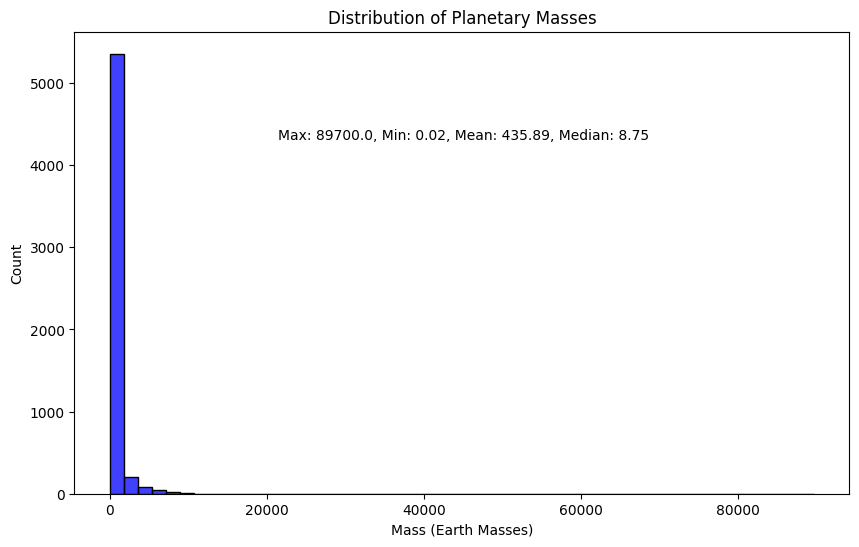

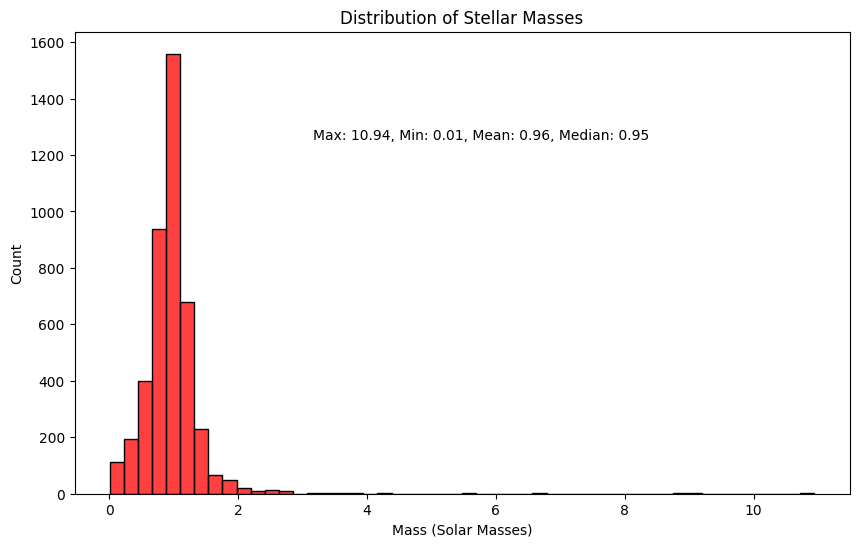

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取CSV檔
data = pd.read_csv('系外行星列表.csv')

# 分別繪製行星質量和恆星質量的直方圖
# 行星質量直方圖
plt.figure(figsize=(10, 6))
sns.histplot(data['行星質量(單位：地球質量)'], bins=50, color='blue')
plt.title('Distribution of Planetary Masses')
plt.xlabel('Mass (Earth Masses)')
plt.ylabel('Count')
plt.figtext(0.7, 0.7, f'Max: {data["行星質量(單位：地球質量)"].max()}, Min: {data["行星質量(單位：地球質量)"].min()}, Mean: {data["行星質量(單位：地球質量)"].mean():.2f}, Median: {data["行星質量(單位：地球質量)"].median():.2f}', horizontalalignment='right')
plt.show()

# 恆星質量直方圖，先過濾重複的恆星名稱
unique_stars = data.drop_duplicates(subset=['所屬恆星名稱'])
plt.figure(figsize=(10, 6))
sns.histplot(unique_stars['所屬恆星質量(單位：太陽質量)'], bins=50, color='red')
plt.title('Distribution of Stellar Masses')
plt.xlabel('Mass (Solar Masses)')
plt.ylabel('Count')
plt.figtext(0.7, 0.7, f'Max: {unique_stars["所屬恆星質量(單位：太陽質量)"].max()}, Min: {unique_stars["所屬恆星質量(單位：太陽質量)"].min()}, Mean: {unique_stars["所屬恆星質量(單位：太陽質量)"].mean():.2f}, Median: {unique_stars["所屬恆星質量(單位：太陽質量)"].median():.2f}', horizontalalignment='right')
plt.show()